In [1]:
# importando bibliotecas uteis em python:
import numpy as np
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from random import randint
from random import random

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é :
# $g_z = -G\frac{m (z-zc)}{[(x-xc)^2 + (z-zc)^2]^{3/2}}$


In [2]:
# definindo as posicoes final e inicial do gravimetro em funcao das coordenadas do perfil sintetico:
min = randint(0,10) #Sorteando a posição inicial do Gravímetro.
max = randint(0,10) #Sorteando a posição final do Gravímetro.
if min > max:       #Caso o mínimo e o máximo estiverem trocados.
    min = max
    max = min
else:
    min = min
    max = max
if min == max:      #Caso o mínimo e o máximo forem iguais.
    min = randint(0,max)
    max = randint(min,10)
#print(min, max)

In [3]:
# definicao das coordenadas do perfil sintetico:
xmin = -100.0 # minimo do perfil
xmax = +100.0 # maximo do perfil
n = 50 # numero de pontos do perfil
x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil

# altura das medidas:
z = -10.0

In [4]:
# definicao das coordenadas do perfil sintetico via edson brain!
coord = list(range(10))   #Estou supondo 10 Gravímetros pois me parece um bom número para conferir o funcionamento do programa.
for n in range(0,10):
    coord[n] = (x[n],0)   #A coordenada z vai ser sempre 0, pois os Gravímetros estão na superfície.
#print (coord[0][1])

In [5]:
#DEFININDO ALGUMAS CONSTANTES
G = 6.674*(10**(-11)) # constante universal no SI:
si2mGal = 100000.0 # conversor de unidades
pi_edson = 3.1415 # não presi
pi = np.pi
#print ('pi_edson =', pi_edson, 'pi_python=', pi)

In [6]:
# Definicao das propriedades da fonte esferica:
xc = 0.0 # metros
zc = 0.5 # metros
raio = 100.0 # metros
rho = 2000.0 # kg/m3
# volume da fonte
V = (4.0/3.0) * pi * raio**3 * rho
massa = V * rho
#print (V, massa)

In [7]:
#Definindo a funcao bolinha:
rmin = 0
rmax = 10
r = np.linspace(rmin,rmax,num=10,endpoint=True)
y = 2*pi*r

In [8]:
# calculo da componente vertical gz:
gz =  - G * massa * (z-zc) / ( (x-xc)**2 + (z-zc)**2 )**(3/2)
gz *= si2mGal
print (gz)
np.savetxt('TODO_021',gz,header='Dados da componente vertical de gz lido em cada posição do Gravímetro')

[   116134.75480065    126109.32958706    137420.29443192
    150316.23976918    165106.0241412     182177.0797124     202020.49861555
    225265.90439763    252730.68143931    285490.65758568
    324983.47973531    373162.89168609    432734.13775241
    507521.97609957    603061.44594535    727573.76444872
    893628.03532925   1121058.58825706   1442227.83030915
   1911655.20327844   2623160.54279798   3735390.53264555
   5477134.99535041   7947719.36458153  10262221.82368716
  10262221.82368716   7947719.36458153   5477134.99535041
   3735390.53264555   2623160.54279798   1911655.20327844
   1442227.83030915   1121058.58825706    893628.03532925
    727573.76444872    603061.44594535    507521.97609957
    432734.13775241    373162.89168609    324983.47973531
    285490.65758568    252730.68143931    225265.90439763
    202020.49861555    182177.0797124     165106.0241412     150316.23976918
    137420.29443192    126109.32958706    116134.75480065]


In [ ]:
# plotando o resultado:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(x,gz,'r+')
plt.title('Comonente Vertical $G_z$')
plt.grid()
plt.subplot(1,2,2)
plt.plot(r,y,'ro')
plt.title('Bolinha')
plt.grid()
plt.savefig('TODO_022.pdf',dpi=300, transparent=True, bbox_inches='tight')
plt.show()

## TODO:
##  1) Subplot com a bolinha, colocando o tamanho da bolinha em funcao do raio
##  2) Salvar a figura e o arquivo com os dados

In [ ]:
plt.figure(figsize=(8,12))
circle1=plt.Circle((xc,zc),radius=raio,color = 'r')
plt.subplot(2,1,1)
plt.plot(x,gz,'r+')
plt.title('Comonente Vertical $G_z$')
plt.grid()

plt.subplot(2,1,2)
plt.gcf().gca().add_artist(circle1)
plt.title('Bolinha em subsuperficie')
plt.grid()
plt.xlim( (-2.0*raio,2.0*raio) )
plt.ylim( (z, 2.0*zc ) )
plt.gca().invert_yaxis()
#plt.savefig('TODO_022.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.savefig('TODO_023.pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

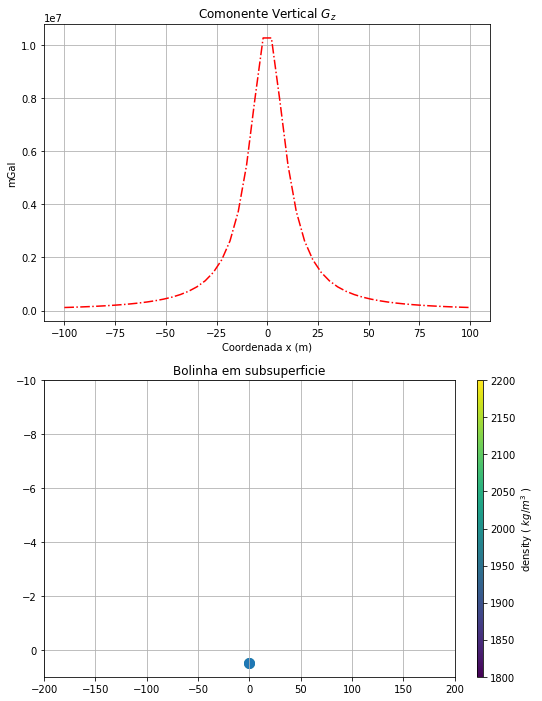

In [9]:
#### Utilizando a funcao scatter (alternativamente):
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.plot(x,gz,'r-.')
plt.title('Comonente Vertical $G_z$')
plt.xlabel('Coordenada x (m)')
plt.ylabel('mGal')
plt.grid()

############# PLOT DA FONTE PONTUAL #################################

plt.subplot(2,1,2)
plt.title('Bolinha em subsuperficie')

p = plt.scatter(xc, zc, s=raio, c=rho )
cbar = plt.colorbar(p, aspect=50, fraction = 0.03, orientation="vertical")
cbar.set_label('density ( $ kg/m^{3}$ )',fontsize=10, rotation = 90)
plt.scatter(xc, zc, s=raio)
plt.grid()
plt.xlim( (-2.0*raio,2.0*raio) )
plt.ylim( (z, 2.0*zc ) )
plt.gca().invert_yaxis()
#plt.savefig('TODO_022.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.savefig('TODO_023.pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

# TODO: Verificar os plots usando a funcao scatter e a funcao edson!